# Chapter 5. Linear Models

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Linear Discriminant Analysis

In [2]:
arrays = np.load('data/iris_train_scaled.npz')
X_train = arrays['X']
y_train = arrays['y']
arrays = np.load('data/iris_test_scaled.npz')
X_test = arrays['X']
y_test = arrays['y']

print('X shape = {}'.format(X_train.shape) + '\ny shape = {}'.format(y_train.shape))

X shape = (120, 4)
y shape = (120,)


In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier as KNN 

knn = KNN(n_neighbors=3)
knn.fit(X_train, y_train)
lda = LDA(solver='lsqr')
qda = QDA()
lda.fit(X_train, y_train)
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [4]:
# weight vector
print(lda.coef_)
print()

# intercept term
print(lda.intercept_)
print()

# estimated class priors
print(lda.priors_)

[[  6.56900824   5.50421661 -35.07162555 -16.88483127]
 [ -1.7703903   -1.99980441  10.43966671   1.97466689]
 [ -4.79861793  -3.5044122   24.63195884  14.91016438]]

[-33.67944828  -3.37778545 -19.90053696]

[0.33333333 0.33333333 0.33333333]


In [5]:
# predicted class labels
pd.DataFrame(X_test @ lda.coef_.T + lda.intercept_).idxmax(axis=1).values

array([1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1, 2, 2, 0, 2, 0, 0, 1, 0, 2, 0, 1,
       1, 0, 2, 0, 0, 2, 2, 1])

In [6]:
# predicted class labels
lda.predict(X_test)

array([1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1, 2, 2, 0, 2, 0, 0, 1, 0, 2, 0, 1,
       1, 0, 2, 0, 0, 2, 2, 1])

In [7]:
qda.predict(X_test)

array([1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1, 2, 2, 0, 2, 0, 0, 1, 0, 2, 0, 1,
       1, 0, 2, 0, 0, 2, 2, 1])

In [11]:
print('LDA test score = {}'.format(lda.score(X_test, y_test)) 
      + '\nQDA test score = {}'.format(qda.score(X_test, y_test))
      + '\nKNN test score = {}'.format(knn.score(X_test, y_test)))

LDA test score = 0.9666666666666667
QDA test score = 0.9666666666666667
KNN test score = 0.9


In [10]:
print('LDA training score = {}'.format(lda.score(X_train, y_train)) 
      + '\nQDA training score = {}'.format(qda.score(X_train, y_train))
      + '\nKNN training score = {}'.format(knn.score(X_train, y_train)))

LDA training score = 0.9833333333333333
QDA training score = 0.9833333333333333
KNN training score = 0.9666666666666667


## Logistic Regression

In [9]:
import numpy as np

arrays = np.load('data/iris_train_scaled.npz')
X_train = arrays['X']
y_train = arrays['y']

arrays = np.load('data/iris_test_scaled.npz')
X_test = arrays['X']
y_test = arrays['y']

print('X shape = {}'.format(X_train.shape) + '\ny shape = {}'.format(y_train.shape))
print('X shape = {}'.format(X_test.shape) + '\ny shape = {}'.format(y_test.shape))

X shape = (120, 4)
y shape = (120,)
X shape = (30, 4)
y shape = (30,)


In [10]:
X_train = X_train[:,[1,2]]
X_test = X_test[:,[1,2]]
X_train.shape

(120, 2)

The accuracy for C=0.01 on the training data is 0.817
The accuracy for C=0.01 on the test data is 0.833
The accuracy for C=100 on the training data is 0.950
The accuracy for C=100 on the test data is 0.967


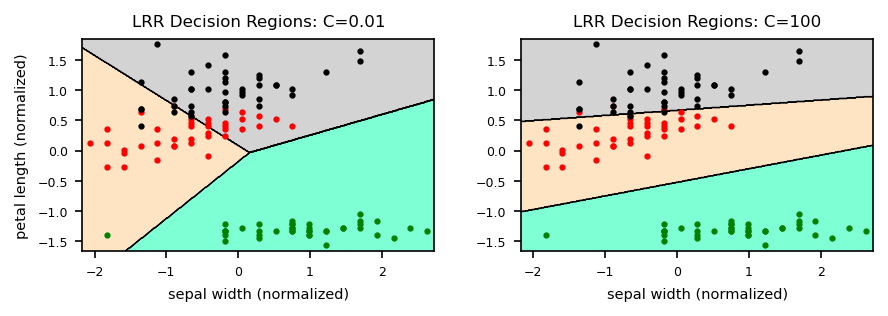

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression as LRR

color = ['aquamarine', 'bisque', 'lightgrey']
cmap = ListedColormap(color)
mins = X_train.min(axis=0) - 0.1
maxs = X_train.max(axis=0) + 0.1
x = np.arange(mins[0], maxs[0], 0.01)
y = np.arange(mins[1], maxs[1], 0.01)
X, Y = np.meshgrid(x, y)
coordinates = np.array([X.ravel(), Y.ravel()]).T
fig, axs = plt.subplots(1, 2, figsize=(6, 2), dpi = 150)
fig.tight_layout()

C_val = [0.01, 100]
for ax, C in zip(axs.ravel(), C_val):
    lrr = LRR(C=C)
    lrr.fit(X_train, y_train)
    Z = lrr.predict(coordinates)
    Z = Z.reshape(X.shape)
    ax.tick_params(axis='both', labelsize=6)
    ax.set_title('LRR Decision Regions: C=' + str(C), fontsize=8)
    ax.pcolormesh(X, Y, Z, cmap = cmap, shading='nearest')
    ax.contour(X ,Y, Z, colors='black', linewidths=0.5)
    ax.plot(X_train[y_train==0, 0], X_train[y_train==0, 1],
            'g.', markersize=4)
    ax.plot(X_train[y_train==1, 0], X_train[y_train==1, 1],
            'r.', markersize=4)
    ax.plot(X_train[y_train==2, 0], X_train[y_train==2, 1],
            'k.', markersize=4)
    
    if (C==C_val[0]): 
        ax.set_ylabel('petal length (normalized)', fontsize=7)
    ax.set_xlabel('sepal width (normalized)', fontsize=7)
    print('The accuracy for C={} on the training data is {:.3f}'.format(C, lrr.score(X_train, y_train)))
    print('The accuracy for C={} on the test data is {:.3f}'.format(C, lrr.score(X_test, y_test)))

In [12]:
# load the dataset
import numpy as np
import pandas as pd

data = pd.read_csv('data/GenomicData_OralCancer.txt', sep=" ", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,19888,19889,19890,19891,19892,19893,19894,19895,19896,19897
0,4.44,8.98,5.58,6.89,6.40,6.35,7.12,6.87,7.18,7.81,...,6.08,5.49,12.59,11.72,8.99,10.87,1,0,1,1
1,4.59,8.57,6.57,7.25,6.44,6.34,7.40,6.91,7.18,8.12,...,6.17,6.08,13.04,11.36,8.96,11.03,1,0,0,1
2,4.74,8.80,6.22,7.13,6.79,6.08,7.42,6.93,7.48,8.82,...,6.39,5.99,13.29,11.87,8.63,10.87,1,1,0,-1
3,4.62,8.77,6.32,7.34,6.29,5.65,7.12,6.89,7.27,7.18,...,6.32,5.69,13.33,12.02,8.86,11.08,0,1,1,1
4,4.84,8.81,6.51,7.16,6.12,5.99,7.13,6.85,7.21,7.97,...,6.57,5.59,13.22,11.87,8.89,11.15,1,1,0,1


In [13]:
header = pd.read_csv('data/GenomicData_OralCancer_var_names.txt', header=None)
data.columns=header.iloc[:,0]
data.head()

,OR4F17,SEPT14,OR4F16,GPAM,LOC100287934,LOC643837,SAMD11,KLHL17,PLEKHN1,ISG15,...,MRGPRX3,OR8G1,SPRR2F,NME2,GRINL1A,UBE2V1,alcohol,smoking,histology,oral_cancer_output
0,4.44,8.98,5.58,6.89,6.40,6.35,7.12,6.87,7.18,7.81,...,6.08,5.49,12.59,11.72,8.99,10.87,1,0,1,1
1,4.59,8.57,6.57,7.25,6.44,6.34,7.40,6.91,7.18,8.12,...,6.17,6.08,13.04,11.36,8.96,11.03,1,0,0,1
2,4.74,8.80,6.22,7.13,6.79,6.08,7.42,6.93,7.48,8.82,...,6.39,5.99,13.29,11.87,8.63,10.87,1,1,0,-1
3,4.62,8.77,6.32,7.34,6.29,5.65,7.12,6.89,7.27,7.18,...,6.32,5.69,13.33,12.02,8.86,11.08,0,1,1,1
4,4.84,8.81,6.51,7.16,6.12,5.99,7.13,6.85,7.21,7.97,...,6.57,5.59,13.22,11.87,8.89,11.15,1,1,0,1


In [14]:
# encode the positive class (oral cancer) as 1
data.loc[:,"oral_cancer_output"] = data.loc[:,"oral_cancer_output"]*-1 
data.head()

,OR4F17,SEPT14,OR4F16,GPAM,LOC100287934,LOC643837,SAMD11,KLHL17,PLEKHN1,ISG15,...,MRGPRX3,OR8G1,SPRR2F,NME2,GRINL1A,UBE2V1,alcohol,smoking,histology,oral_cancer_output
0,4.44,8.98,5.58,6.89,6.40,6.35,7.12,6.87,7.18,7.81,...,6.08,5.49,12.59,11.72,8.99,10.87,1,0,1,-1
1,4.59,8.57,6.57,7.25,6.44,6.34,7.40,6.91,7.18,8.12,...,6.17,6.08,13.04,11.36,8.96,11.03,1,0,0,-1
2,4.74,8.80,6.22,7.13,6.79,6.08,7.42,6.93,7.48,8.82,...,6.39,5.99,13.29,11.87,8.63,10.87,1,1,0,1
3,4.62,8.77,6.32,7.34,6.29,5.65,7.12,6.89,7.27,7.18,...,6.32,5.69,13.33,12.02,8.86,11.08,0,1,1,-1
4,4.84,8.81,6.51,7.16,6.12,5.99,7.13,6.85,7.21,7.97,...,6.57,5.59,13.22,11.87,8.89,11.15,1,1,0,-1


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as LRR

y_train = data.oral_cancer_output
X_train = data.drop('oral_cancer_output', axis=1)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

lrr = LRR(penalty='l1', C=16, solver='liblinear', random_state=42)
lrr.fit(X_train, y_train)

LogisticRegression(C=16, penalty='l1', random_state=42, solver='liblinear')

In [16]:
# check the number of non-zero coefficients
coeffs = lrr.coef_.ravel()
np.sum(coeffs != 0)

292

In [17]:
non_zero_coeffs = coeffs[coeffs!= 0]

# odds ratios
ORs = np.exp(non_zero_coeffs) 
sorted_args = ORs.argsort()
ORs_sorted=ORs[sorted_args]
ORs_sorted[:10]

array([0.74175367, 0.76221689, 0.77267586, 0.77451542, 0.78316466,
       0.8163162 , 0.83429172, 0.83761203, 0.84076963, 0.84205156])

In [18]:
feature_names = header.iloc[:-1,0].values
selected_features = feature_names[coeffs!= 0]
selected_features_sorted = selected_features[sorted_args]
selected_features_sorted[0:10]

array(['DGCR6', 'ZNF609', 'CNO', 'RNASE13', 'BRD7P3', 'HHAT', 'UBXN1',
       'C15orf62', 'ORAI2', 'C1orf151'], dtype=object)

In [19]:
RCO=(ORs_sorted-1.0)*100
selected_RCOs=np.concatenate((RCO[:10], RCO[-10:]))
features_selected_RCOs = np.concatenate((selected_features_sorted[:10], 
                                         selected_features_sorted[-10:]))
features_selected_RCOs

array(['DGCR6', 'ZNF609', 'CNO', 'RNASE13', 'BRD7P3', 'HHAT', 'UBXN1',
       'C15orf62', 'ORAI2', 'C1orf151', 'KIR2DS5', 'LOC136242', 'SNORD33',
       'SEMG1', 'LOC100133746', 'SNORD41', 'C6orf10', 'C21orf84',
       'DNAJA2', 'MMP26'], dtype=object)

(array([-30., -20., -10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(0, -30.0, '−30'),
  Text(0, -20.0, '−20'),
  Text(0, -10.0, '−10'),
  Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60')])

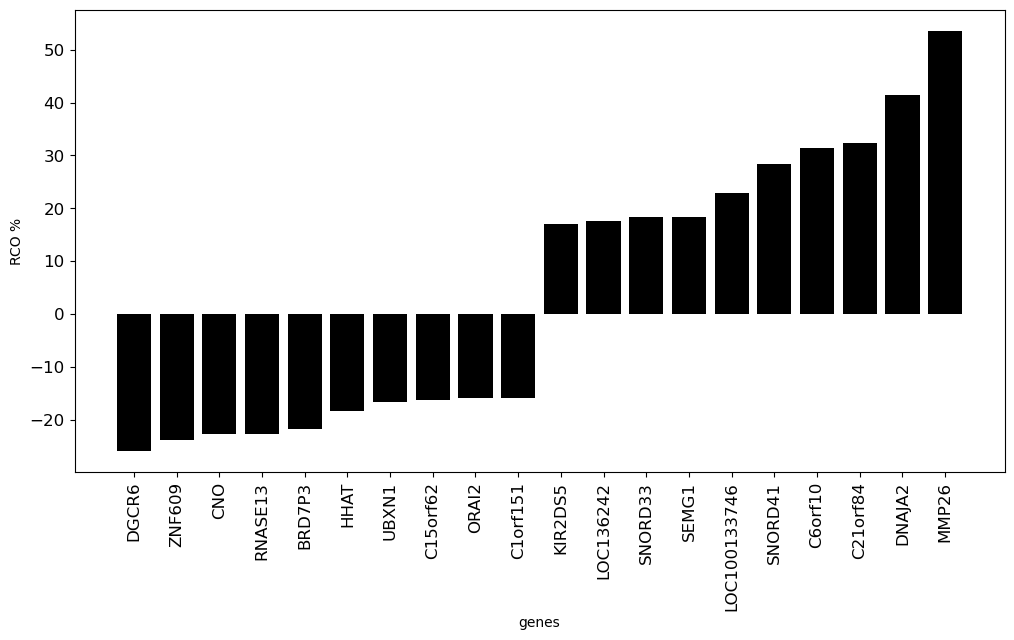

In [20]:
from matplotlib import pyplot
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
pyplot.bar(features_selected_RCOs, selected_RCOs, color='black')
plt.xlabel('genes')
plt.ylabel('RCO %')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

### Regression

In [21]:
from ISLP import load_data
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [22]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [23]:
Boston.medv.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

In [24]:
from sklearn.linear_model import LinearRegression as LR

In [25]:
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]), 
                  'lstat': Boston['lstat']})
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [26]:
y = Boston['medv']
model = LR(fit_intercept=False)
results = model.fit(X, y)

In [27]:
results.coef_

array([34.55384088, -0.95004935])

In [28]:
results?

Type:        LinearRegression
String form: LinearRegression(fit_intercept=False)
File:        ~/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_base.py
Docstring:  
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

copy_X : bool, default=True
    If True, X will be copied; else, it may be overwritten.

n_jobs : int, default=None
    The number of jobs to use for the computation. This will only provide
    speedup in case of sufficiently large problems, that is if firstly
    `n_targets > 1` and secondly `X` is sparse or if `positive` is set
    to `True

In [29]:
def abline(ax, b, m):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim)

In [30]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)


In [31]:
results.coef_

array([34.55384088, -0.95004935])

Text(0, 0.5, 'medv')

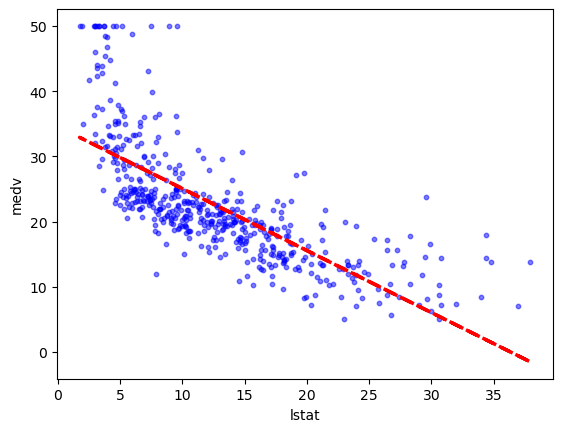

In [32]:
plt.scatter(Boston['lstat'], Boston['medv'], facecolors='blue', 
            edgecolors='blue', marker='o', s=10, alpha=0.5)
plt.plot(Boston['lstat'], 
         results.coef_[0] + results.coef_[1] * Boston['lstat'], 
         color='red', linestyle='dashed', linewidth=2.5)
plt.xlabel('lstat')
plt.ylabel('medv')


### Regularization

In [33]:
from sklearn.linear_model import ElasticNet as EN
from sklearn.linear_model import Ridge as RR

We will apply different regularization methods to the `Hitters` data. We wish
to predict a baseball player’s `Salary` on the basis of various statistics associated
with performance in the previous year.

First of all, we note that the `Salary` variable is missing for some of the
players. The `np.isnan()` function can be used to identify the missing observations. It returns an array of the same shape as the input vector, with a `True` for any elements that are missing, and a `False` for non-missing elements. The `sum()` method can then be used to count all of the missing elements.

In [34]:
Hitters = load_data('Hitters')
np.isnan(Hitters['Salary']).sum()

59

We see that `Salary` is missing for 59 players. The `dropna()` method of data
frames removes all of the rows that have missing values in any variable (by
default — see `Hitters.dropna?`).

In [35]:
Hitters = Hitters.dropna()
feature_names = Hitters.columns.drop('Salary')
Hitters.shape

(263, 20)

In [36]:
Y = np.array(Hitters['Salary'])
X = Hitters.drop('Salary', axis=1)
change = {'League': {'A': 0, 'N': 1}, 
           'NewLeague': {'A': 0, 'N': 1},
              'Division': {'E': 0, 'W': 1}}
X.replace(change, inplace=True)
X = X.astype('float64').values

Xs = X - X.mean(0)[None ,:]
X_scale = X.std(0)
Xs = Xs / X_scale[None ,:]
Ys = Y - Y.mean()


#### Ridge

In [37]:
rr = RR(alpha=0 * X.shape[0], solver='lsqr', fit_intercept=False)
rr.fit(Xs, Ys)
rr.solution = pd.Series(rr.coef_, 
                        index=feature_names)
print(rr.solution.round(3))

AtBat       -288.241
Hits         332.875
HmRun         36.711
Runs         -57.672
RBI          -26.156
Walks        134.180
Years        -15.613
CAtBat      -412.204
CHits        125.333
CHmRun        -6.160
CRuns        463.755
CRBI         248.244
CWalks      -209.499
League        31.554
Division     -58.463
PutOuts       78.636
Assists       54.188
Errors       -22.465
NewLeague    -12.726
dtype: float64


In [38]:
rr = RR(alpha=0.1 * X.shape[0], solver='lsqr', fit_intercept=False)
rr.fit(Xs, Ys)
rr.solution = pd.Series(rr.coef_, 
                        index=feature_names)
print(rr.solution.round(3))

AtBat       -58.575
Hits         93.023
HmRun       -11.547
Runs         29.250
RBI          20.546
Walks        60.653
Years       -31.619
CAtBat       12.031
CHits        71.249
CHmRun       51.981
CRuns        74.730
CRBI         72.354
CWalks      -43.657
League       23.475
Division    -59.592
PutOuts      70.603
Assists      18.467
Errors      -22.087
NewLeague    -5.355
dtype: float64


In [65]:
import warnings
warnings.filterwarnings("ignore")

alphas = np.insert(10**np.linspace(-2, 8, 100) / Y.std(), 0, 0)
soln_array = EN(fit_intercept=False).path(Xs, Ys, l1_ratio=0.,
                                          alphas=alphas, max_iter=1e4)[1]
soln_array.shape

(19, 101)

In [66]:
soln_path = pd.DataFrame(soln_array.T[::-1], 
                         columns=feature_names,
                         index=np.log(alphas))
soln_path.index.name = 'log(alphas)'
soln_path

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
log(alphas),,,,,,,,,,,,,,,,,,,
-inf,-291.094556,337.830479,37.853837,-60.572479,-26.994984,135.073897,-16.693359,-391.038655,86.687617,-14.181723,480.747135,260.689886,-213.892259,31.248763,-58.414064,78.761296,53.732490,-22.160862,-12.348811
-10.714996,-290.991478,337.477879,37.643507,-60.246810,-26.801574,134.988353,-16.903097,-389.720125,87.808474,-13.427272,478.899034,259.336465,-213.590566,31.252274,-58.431503,78.761389,53.688281,-22.179564,-12.370117
-10.482412,-290.964664,337.386393,37.588886,-60.162312,-26.751340,134.966117,-16.957854,-389.373895,88.094885,-13.232142,478.419970,258.986125,-213.512449,31.253146,-58.436043,78.761421,53.676680,-22.184399,-12.375610
-10.249827,-290.930926,337.271434,37.520226,-60.056140,-26.688192,134.938152,-17.026850,-388.936485,88.452215,-12.987323,477.818285,258.546406,-213.414386,31.254219,-58.441758,78.761465,53.662029,-22.190465,-12.382493
-10.017243,-290.888505,337.127132,37.434004,-59.922876,-26.608885,134.903013,-17.113754,-388.383763,88.896737,-12.680608,477.063484,257.995250,-213.291441,31.255531,-58.448944,78.761527,53.643522,-22.198062,-12.391101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11.380518,0.002029,0.002255,0.001763,0.002158,0.002310,0.002281,0.002059,0.002704,0.002821,0.002698,0.002892,0.002914,0.002517,-0.000073,-0.000990,0.001544,0.000131,-0.000028,-0.000015
11.613102,0.001608,0.001787,0.001397,0.001710,0.001831,0.001808,0.001632,0.002143,0.002236,0.002138,0.002292,0.002309,0.001995,-0.000058,-0.000784,0.001224,0.000104,-0.000022,-0.000012
11.845686,0.001274,0.001416,0.001107,0.001355,0.001451,0.001433,0.001293,0.001698,0.001772,0.001694,0.001816,0.001830,0.001581,-0.000046,-0.000621,0.000970,0.000082,-0.000017,-0.000009


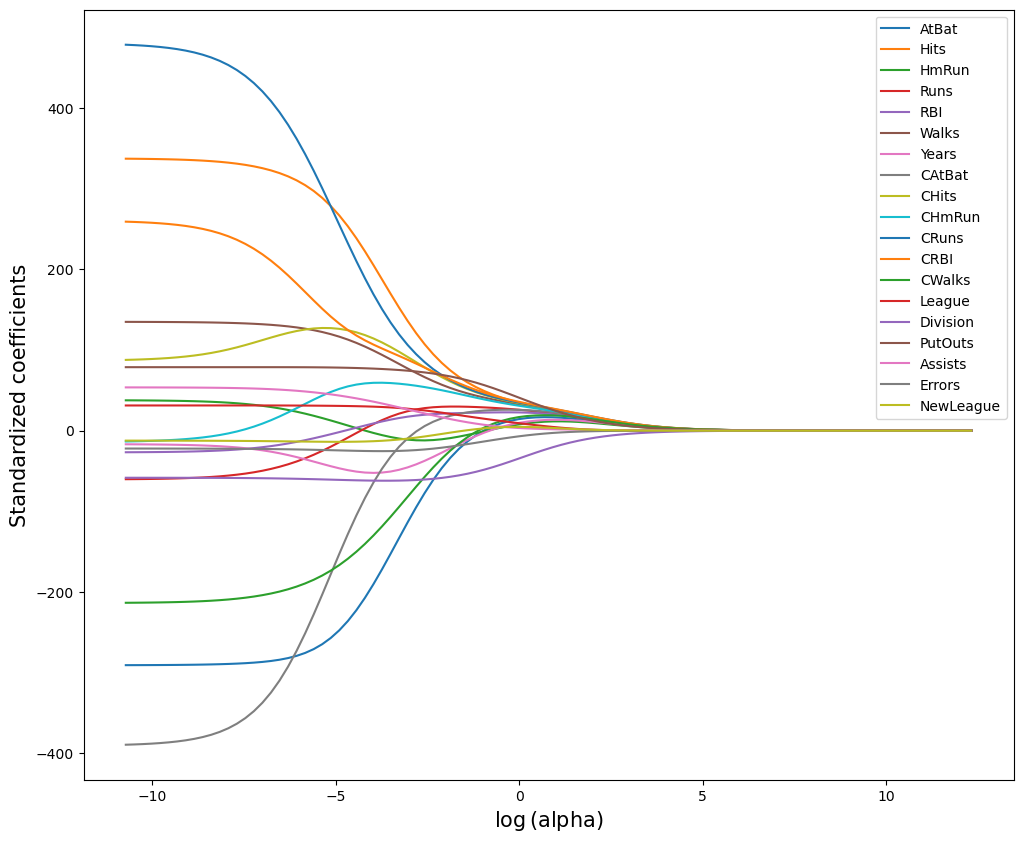

In [67]:
from matplotlib.pyplot import subplots

path_fig , ax = subplots(figsize=(12,10))
soln_path.plot(ax=ax, legend=False)
ax.set_xlabel('$\log$(alpha)', fontsize=15)
ax.set_ylabel('Standardized coefficients', fontsize=15)
ax.legend(loc='upper right')

Above we normalized `X` upfront, and fit the ridge model using `Xs`. The `Pipeline()` object in `sklearn` provides a clear way to separate feature normalization from the fitting of the ridge model itself.

In [68]:
from sklearn.pipeline import Pipeline

ridge = EN(alpha=alphas[50], l1_ratio=0)
scaler = StandardScaler(with_mean=True , with_std=True)
pipe = Pipeline(steps=[('scaler', scaler), ('ridge', ridge)])
pipe.fit(X, Y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=1.97711243041609, l1_ratio=0))])

In [69]:
pd.Series(ridge.coef_, index=feature_names).round(3)

AtBat        16.737
Hits         27.154
HmRun        11.071
Runs         22.646
RBI          21.214
Walks        26.593
Years        13.134
CAtBat       23.909
CHits        28.376
CHmRun       26.149
CRuns        29.013
CRBI         29.499
CWalks       19.181
League        5.677
Division    -23.833
PutOuts      29.312
Assists       2.004
Errors       -3.653
NewLeague     3.865
dtype: float64

In [70]:
import sklearn.model_selection as skm

validation = skm.ShuffleSplit(n_splits=1, test_size=0.25, random_state=0)
ridge.alpha = 0.01

results = skm.cross_validate(ridge ,
                             X, Y,
                             scoring='neg_mean_squared_error',
                             cv=validation)
-results['test_score']

array([131989.82972988])

We can use the validation-set approach to choose the tuning parameter $\alpha$. The object
`GridSearchCV()` allows exhaustive grid search to choose such a parameter.

In [71]:
param_grid = {'ridge__alpha': alphas}

grid = skm.GridSearchCV(pipe, param_grid, 
                        cv=validation, 
                        scoring='neg_mean_squared_error')
grid.fit(X, Y)
grid.best_params_['ridge__alpha']
best_ridge = grid.best_estimator_.named_steps['ridge']
best_ridge

ElasticNet(alpha=0.004674861409328469, l1_ratio=0)

In [72]:
[best_ridge.alpha, best_ridge.coef_]

[0.004674861409328469,
 array([-264.97207276,  288.86711419,   15.6421743 ,  -25.09894758,
          -7.0220354 ,  122.41857935,  -41.27353538, -203.38610906,
         127.40194443,   43.49677069,  300.85148172,  151.28105936,
        -179.77327676,   30.94372861,  -60.49400301,   78.5265124 ,
          46.38430414,  -23.97939773,  -13.75915381])]

#### Lasso

In [73]:
from sklearn.linear_model import Lasso as LASSO

In [77]:
alphas , soln_array = LASSO.path(Xs, Y, 
                                 l1_ratio=1, n_alphas=100)[:2]
soln_path = pd.DataFrame(soln_array.T, 
                         columns=feature_names, 
                         index=np.log(alphas))

In [78]:
soln_path

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
5.542369,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000
5.472594,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,17.205159,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000
5.402819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,33.250748,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000
5.333043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,6.545671,42.024827,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000
5.263268,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,13.727251,49.189007,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-1.086285,-292.618320,330.147359,25.671504,-49.562410,-13.598973,130.583914,-24.123416,-286.579896,31.226178,-0.0,452.829429,229.229316,-209.493673,28.373513,-58.125944,79.096546,49.338699,-20.820927,-9.515995
-1.156060,-292.511837,330.496934,26.317012,-50.124459,-14.357879,130.849065,-23.603337,-294.116322,37.120221,-0.0,453.537777,229.848245,-209.616048,28.584855,-58.145706,79.080585,49.655372,-20.923792,-9.725398
-1.225835,-292.413043,330.823484,26.918970,-50.648775,-15.065567,131.096456,-23.118630,-301.141293,42.613785,-0.0,454.198913,230.425310,-209.730604,28.781925,-58.164143,79.065724,49.950637,-21.019700,-9.920665
-1.295611,-292.320279,331.127368,27.480414,-51.137572,-15.725645,131.327039,-22.666199,-307.697118,47.741074,-0.0,454.814838,230.963666,-209.836915,28.965748,-58.181330,79.051835,50.226081,-21.109174,-10.102799


Text(0, 0.5, 'Standardized coefficiients')

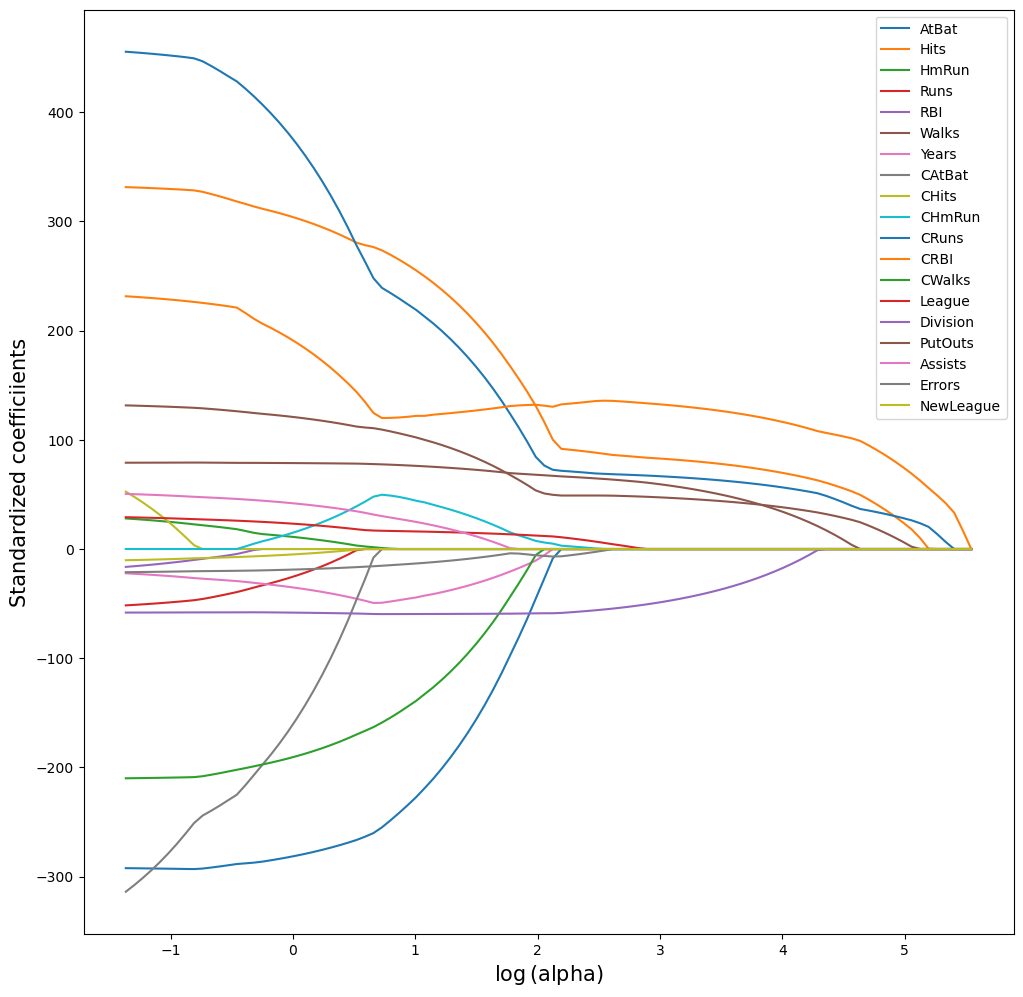

In [83]:
path_fig , ax = subplots(figsize=(12,12))
soln_path.plot(ax=ax, legend=False)
ax.legend(loc='upper right')
ax.set_xlabel('$\log$(alpha)', fontsize=15)
ax.set_ylabel('Standardized coefficiients', fontsize=15)

In [84]:
alphas

array([255.28209651, 238.0769376 , 222.03134882, 207.06717903,
       193.11154419, 180.09647243, 167.95857295, 156.63872727,
       146.08180131, 136.23637682, 127.05450099, 118.49145286,
       110.50552551, 103.05782294,  96.1120706 ,  89.63443871,
        83.59337754,  77.95946367,  72.70525674,  67.80516577,
        63.23532454,  58.9734753 ,  54.99886045,  51.29212133,
        47.83520402,  44.61127137,  41.60462098,  38.80060878,
        36.18557761,  33.74679078,  31.47237003,  29.35123763,
        27.37306245,  25.52820965,  23.80769376,  22.20313488,
        20.7067179 ,  19.31115442,  18.00964724,  16.7958573 ,
        15.66387273,  14.60818013,  13.62363768,  12.7054501 ,
        11.84914529,  11.05055255,  10.30578229,   9.61120706,
         8.96344387,   8.35933775,   7.79594637,   7.27052567,
         6.78051658,   6.32353245,   5.89734753,   5.49988604,
         5.12921213,   4.7835204 ,   4.46112714,   4.1604621 ,
         3.88006088,   3.61855776,   3.37467908,   3.14